In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install scikit-plot

In [ ]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import nltk
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
import scikitplot as skplt
import os
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Accuracy Score
# Confusion Matrix
# Classification Report


#import methods
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
colnames=['PID', 'Text data', 'Label']
df1=pd.read_csv("/content/drive/MyDrive/codalab/community.csv",names=colnames,header=0)
df2=pd.read_csv("/content/drive/MyDrive/codalab/individual.csv",names=colnames,header=0)
df3=pd.read_csv("/content/drive/MyDrive/codalab/organisation.csv",names=colnames,header=0)

In [ ]:
df=pd.DataFrame()
for i in range(len(df1)):
        df = df.append(df1.loc[i])

# Reset the index of the updated DataFrame
df.reset_index(drop=True, inplace=True)


<ipython-input-6-23647f5dfde5>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df1.loc[i])
<ipython-input-6-23647f5dfde5>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df1.loc[i])
<ipython-input-6-23647f5dfde5>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df1.loc[i])
<ipython-input-6-23647f5dfde5>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df1.loc[i])
<ipython-input-6-23647f5dfde5>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df1.loc[i])
<ipython-input-6-236

In [ ]:
print(df)

       PID                                          Text data  Label
0    36152    Ukraine army when seeing russian conscripts ...      1
1    61218    When you're in the Russian military and ther...      1
2    97170    me when post UKRAINE IS PRO RUSSIAN WINNING ...      1
3    90037    "When your govt has not cooperated with uS, ...      1
4    52054    Based oppositional Russians Cringe Putinist ...      1
..     ...                                                ...    ...
330  20433    Can you see it? War Torn Ukraine Peaceful" B...      1
331  96113                                  Glory for russial      1
332  17144    datheists tohell? Ns 231 Staight to hell: Ho...      1
333  80741    posting forever @postingwhilegay 16h is anyo...      1
334  27947    David Corn @DavidCornDC Do you think America...      1

[335 rows x 3 columns]


In [ ]:
for i in range(len(df2)):
        df = df.append(df2.loc[i])

# Reset the index of the updated DataFrame
df.reset_index(drop=True, inplace=True)

<ipython-input-8-bb8fb2c37300>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2.loc[i])
<ipython-input-8-bb8fb2c37300>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2.loc[i])
<ipython-input-8-bb8fb2c37300>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2.loc[i])
<ipython-input-8-bb8fb2c37300>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2.loc[i])
<ipython-input-8-bb8fb2c37300>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2.loc[i])
<ipython-input-8-bb8

In [ ]:
print(df)

        PID                                          Text data  Label
0     36152    Ukraine army when seeing russian conscripts ...      1
1     61218    When you're in the Russian military and ther...      1
2     97170    me when post UKRAINE IS PRO RUSSIAN WINNING ...      1
3     90037    "When your govt has not cooperated with uS, ...      1
4     52054    Based oppositional Russians Cringe Putinist ...      1
...     ...                                                ...    ...
1153  22424                                       WAR CRIMINAL      0
1154  79591    THIS IS WHAT VLADIMIR PUTIN CALLS 'LIBERATIN...      0
1155  99767    IS THIS [T? IS THIS ALL YOU CAN CONJURE; VLA...      0
1156  26915    JOE BIDEN Indognito during secret visit to U...      0
1157  20806    PLEASE, ITS MY 2 HUMANITARIAN CORRIDOR Blowv...      0

[1158 rows x 3 columns]


In [ ]:
for i in range(len(df3)):
        df = df.append(df3.loc[i])

# Reset the index of the updated DataFrame
df.reset_index(drop=True, inplace=True)

<ipython-input-10-38d0a779c3b3>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df3.loc[i])
<ipython-input-10-38d0a779c3b3>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df3.loc[i])
<ipython-input-10-38d0a779c3b3>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df3.loc[i])
<ipython-input-10-38d0a779c3b3>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df3.loc[i])
<ipython-input-10-38d0a779c3b3>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df3.loc[i])
<ipython-input-

In [ ]:
print(df)

        PID                                          Text data  Label
0     36152    Ukraine army when seeing russian conscripts ...      1
1     61218    When you're in the Russian military and ther...      1
2     97170    me when post UKRAINE IS PRO RUSSIAN WINNING ...      1
3     90037    "When your govt has not cooperated with uS, ...      1
4     52054    Based oppositional Russians Cringe Putinist ...      1
...     ...                                                ...    ...
1937  57644    STOPNATO WAR ONRUSSIAA NATO LIT THE FUSE NO ...      2
1938  17299    These are the Republicans who spent Independ...      2
1939  53136    RUSSIA HOLDSAREFERENDUMTO CLAIMYHERSONREGHON...      2
1940  82210    UKRAINE RIGHTFULLY BELONGS TO Australia 6 Th...      2
1941  42716    The media you forget the last two years of n...      2

[1942 rows x 3 columns]


In [ ]:
print(len(df))

1942


In [ ]:
print(df)

        PID                                          Text data  Label
0     36152    Ukraine army when seeing russian conscripts ...      1
1     61218    When you're in the Russian military and ther...      1
2     97170    me when post UKRAINE IS PRO RUSSIAN WINNING ...      1
3     90037    "When your govt has not cooperated with uS, ...      1
4     52054    Based oppositional Russians Cringe Putinist ...      1
...     ...                                                ...    ...
1937  57644    STOPNATO WAR ONRUSSIAA NATO LIT THE FUSE NO ...      2
1938  17299    These are the Republicans who spent Independ...      2
1939  53136    RUSSIA HOLDSAREFERENDUMTO CLAIMYHERSONREGHON...      2
1940  82210    UKRAINE RIGHTFULLY BELONGS TO Australia 6 Th...      2
1941  42716    The media you forget the last two years of n...      2

[1942 rows x 3 columns]


In [ ]:
countm=0
countn=0
counts=0
for i in range(len(df)):
  if df['Label'][i]==0:
    countn+=1
  elif df['Label'][i]==1:
    countm+=1
  elif df['Label'][i]==2:
    counts+=1
print("individual:",countn)
print("community:",counts)
print("organisation:",countm)

individual: 823
community: 784
organisation: 335


In [ ]:
df_Label=df['Label']
print(len(df_Label))

1942


In [ ]:
train_set, test_set= train_test_split(df, test_size = 0.20, random_state = 42)
print(train_set.shape)
print(test_set.shape)
print("\nThe Trainset consists of {} records and {} features".format(train_set.shape[0],train_set.shape[1]))
print("\nThe Testset consists of {} records and {} features".format(test_set.shape[0],train_set.shape[1]))

(1553, 3)
(389, 3)

The Trainset consists of 1553 records and 3 features

The Testset consists of 389 records and 3 features


In [ ]:
print(train_set['Label'],train_set['PID'])

1918    2
809     0
1537    2
534     0
192     1
       ..
1130    0
1294    2
860     0
1459    2
1126    0
Name: Label, Length: 1553, dtype: int64 1918    68210
809     73815
1537    97652
534     99659
192     26058
        ...  
1130    92648
1294    33052
860     51909
1459    46210
1126    80551
Name: PID, Length: 1553, dtype: int64


In [ ]:
import joblib
countvect = CountVectorizer(ngram_range = (2,2), )
x_counts = countvect.fit(train_set['Text data'])
joblib.dump(countvect, "countvectorizer.pkl")
# preparing for training set
x_train_df = countvect.transform(train_set['Text data'])

# preparing for test set
x_test_df = countvect.transform(test_set['Text data'])




The accuracy of Naive Bayes clasifier is 59.383033419023135%

 [[126   3  35]
 [ 25   8  35]
 [ 58   2  97]]


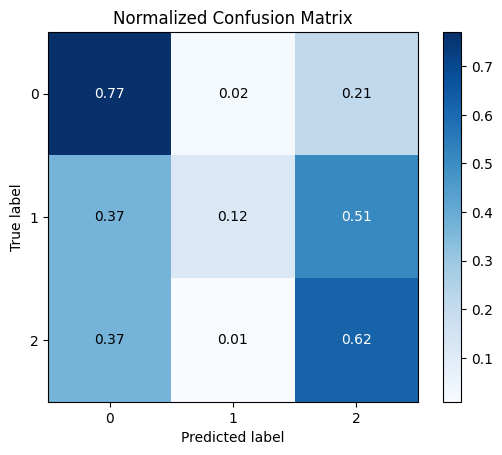

['model.pkl']

In [ ]:
import joblib
clf = MultinomialNB()
clf.fit(x_train_df,train_set['Label'])
predicted_values_NB = clf.predict(x_test_df)
predictions = dict()
accuracy = accuracy_score(test_set['Label'], predicted_values_NB)
predictions['Naive Bayes'] = accuracy * 100
confusionmatrix = confusion_matrix(test_set['Label'], predicted_values_NB)
print("The accuracy of Naive Bayes clasifier is {}%".format(accuracy * 100))
print("\n", confusionmatrix)
skplt.metrics.plot_confusion_matrix(test_set['Label'], predicted_values_NB, normalize = True)
plt.show()
joblib.dump(clf, "model.pkl")

In [ ]:
from sklearn.metrics import classification_report
y_true = test_set.Label
y_pred = predicted_values_NB
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.60      0.77      0.68       164
     class 1       0.62      0.12      0.20        68
     class 2       0.58      0.62      0.60       157

    accuracy                           0.59       389
   macro avg       0.60      0.50      0.49       389
weighted avg       0.60      0.59      0.56       389



In [ ]:
from sklearn import svm
import joblib
d_f=pd.read_csv("/content/drive/MyDrive/codalab/testb.csv")

countvect = joblib.load("countvectorizer.pkl")
# Create a placeholder column with default values
transform=countvect.transform(d_f['TEXT DATA'])

# Load the saved model
clf = joblib.load("model.pkl")

# Use the model to make predictions
predictions = clf.predict(transform)
print(predictions)

[0 0 0 1 1 2 2 0 0 0 2 2 0 2 1 2 2 2 2 2 2 2 2 2 0 0 1 0 2 2 0 2 0 2 2 2 0
 2 0 0 2 2 2 2 0 0 0 0 0 0 1 0 2 2 2 0 0 2 2 0 2 0 0 0 0 0 0 0 1 2 0 0 0 0
 0 0 2 2 0 2 2 2 0 0 0 0 0 2 2 0 0 2 2 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 2 0 0 0 0 0 0 2 2 0 2 2 2 1 0 0 2 0 2 0 2 0 0 0 0 0 0 2 0 0 0 2 0 0 2 2
 2 0 0 2 2 0 0 0 2 0 2 2 0 0 2 2 0 2 2 0 0 0 2 0 2 0 0 0 2 0 2 2 2 0 0 2 0
 2 2 2 0 2 2 2 1 2 2 2 0 2 2 2 0 2 2 2 2 0 0 0 0 0 0 1 2 0 2 2 0 2 2 2 2 2
 0 1 2 0 2 2 2 2 2 2 0 2 2 0 0 2 2 0 0 2]


In [ ]:
for i in range(len(d_f)):
  if predictions[i]==0:
    d_f['LABEL'][i]='0'
  elif predictions[i]==1:
    d_f['LABEL'][i]='1'
  elif predictions[i]==2:
    d_f['LABEL'][i]='2'

<ipython-input-38-1c7a5db6dccc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_f['LABEL'][i]='0'


In [ ]:
d_f.to_csv('output.csv', index=False)

In [ ]:
import pandas as pd
d_f=pd.read_csv('output.csv')
df_sorted = df.sort_values('ID')
df1=pd.DataFrame()
df1['index']=df_sorted['ID']
df1['prediction']=d_f['LABEL']

KeyError: ignored

In [ ]:
import pandas as pd

# Assuming you have a DataFrame named 'df' with columns 'index' and 'prediction'

# Convert DataFrame to JSON
json_data = df1.to_json(orient='records',lines=True)

# Save JSON data to a file
with open('predictions.json', 'w') as file:
    file.write(json_data)